# Scaling Numeric Data

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from wrangle import get_zillow_data
from wrangle import wrangle_zillow
from sklearn.model_selection import train_test_split
from prepare import min_max_scaller, standard_scaller, robust_scaller

import sklearn.preprocessing 
import prepare

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Acquire the data
zillow = get_zillow_data()

Program Status: Acquiring local cached zillow data..


In [3]:
zillow

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0
...,...,...,...,...,...,...,...
2152858,4.0,3.0,2262.0,960756.0,2015.0,13494.52,6059.0
2152859,4.0,4.5,3127.0,536061.0,2014.0,6244.16,6059.0
2152860,0.0,0.0,NaN,208057.0,NaN,5783.88,6059.0
2152861,3.0,2.5,1974.0,424353.0,2015.0,5302.70,6059.0


In [4]:
# Clean and split the data

train, validate, test = wrangle_zillow()

Program Status: Acquiring local cached zillow data..


In [5]:
(train.shape, validate.shape, test.shape)

((1198531, 7), (513657, 7), (428047, 7))

### (1). Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution .

# Min-Max Scaling

Min-max scaling is a linear scaling method that transforms our features such that the range is between 0 and 1.

In [6]:
# Import the scalling library

min_max_scaler = sklearn.preprocessing.MinMaxScaler()

In [7]:
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.

min_max_scaler.fit(train)

x_train_min_max_scaled = min_max_scaler.transform(train)
x_validate_min_max_scaled = min_max_scaler.transform(validate)
x_test_min_max_scaled = min_max_scaler.transform(test)

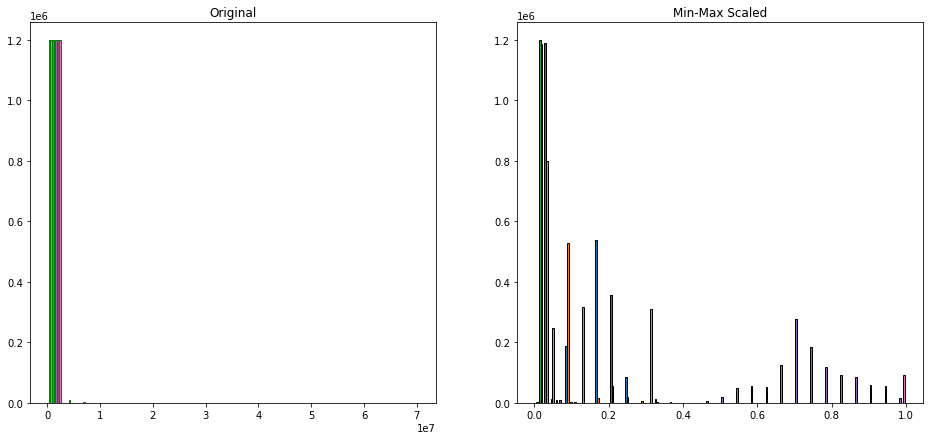

In [8]:
plt.figure(figsize=(16, 7))
plt.subplot(121)
plt.hist(train, bins=25, ec='green')
plt.title('Original')
plt.subplot(122)
plt.hist(x_train_min_max_scaled, bins=25, ec='black')
plt.title('Min-Max Scaled')
plt.show()

# Standard Scaler

In [9]:
# Import required library
std_scaler = sklearn.preprocessing.StandardScaler()

In [10]:
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.

std_scaler.fit(train)

x_train_std_scaled = std_scaler.transform(train)
x_validate_std_scaled = std_scaler.transform(validate)
x_test_std_scaled = std_scaler.transform(test)

Text(0.5, 1.0, 'Scaled')

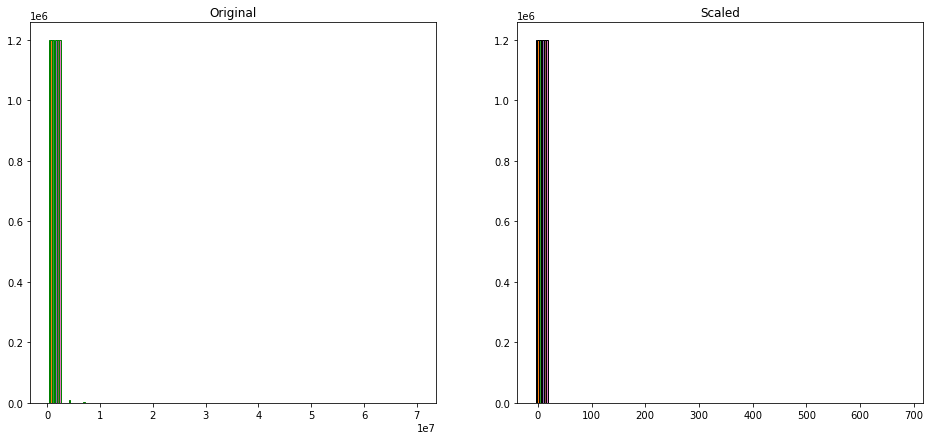

In [11]:
plt.figure(figsize=(16, 7))
plt.subplot(121)
plt.hist(train, bins=25, ec='green')
plt.title('Original')
plt.subplot(122)
plt.hist(x_train_std_scaled, bins=25, ec='black')
plt.title('Scaled')

# Robust Scaler
A robust scaler is another linear transformation that follows the same idea as the standard scaler but uses parameters that are more robust to outliers.

In [12]:
# Import the required library

robust_scaler = sklearn.preprocessing.RobustScaler()

Text(0.5, 1.0, 'Robust Scaled')

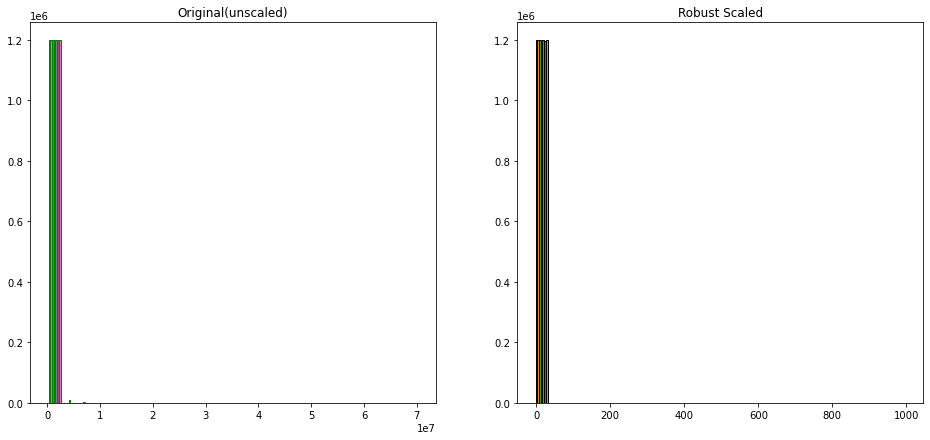

In [13]:
# Fit the scaller on train set

robust_scaler.fit(train)

x_train_robust_scaler = robust_scaler.transform(train)
x_validate_robust_scaler = robust_scaler.transform(validate)
x_test_robust_scaler = robust_scaler.transform(test)


# Visualize scaled vs unscalled data
plt.figure(figsize = (16, 7))
plt.subplot(121)
plt.hist(train, bins = 25, ec = 'green')
plt.title('Original(unscaled)')

plt.subplot(122)
plt.hist(x_train_robust_scaler, bins = 25, ec = 'black')
plt.title('Robust Scaled')

### (2). Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?


## Inverse Min-Max Scaler

Text(0.5, 1.0, 'Inverse Scaled Std Histogram')

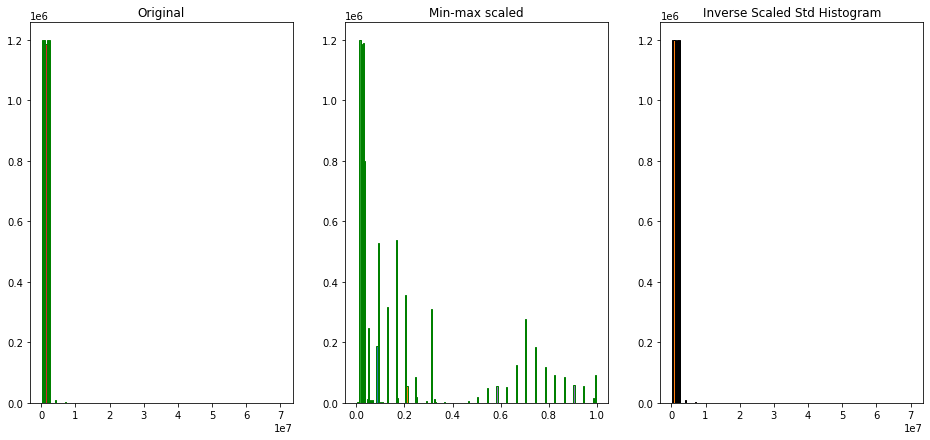

In [14]:
# Inverse Min-Max Scaler

# Import the scalling library
min_max_scaler = sklearn.preprocessing.MinMaxScaler()

# Fit the train
min_max_scaler.fit(train)

# Min_max transform
x_train_min_max_scaled = min_max_scaler.transform(train)
x_validate_min_max_scaled = min_max_scaler.transform(validate)
x_test_min_max_scaled = min_max_scaler.transform(test)

# Perform the inverse on the min-max
x_train_inverse_transform= min_max_scaler.inverse_transform(x_train_min_max_scaled)
x_validate_inverse_transform = min_max_scaler.inverse_transform(x_validate_min_max_scaled)
x_test_inverse_transform = min_max_scaler.inverse_transform(x_test_min_max_scaled)

plt.figure(figsize = (16, 7))
plt.subplot(131)
plt.hist(train, bins = 25, ec = 'green')
plt.title('Original')

plt.subplot(132)
plt.hist(x_train_min_max_scaled, bins = 25, ec = 'green')
plt.title('Min-max scaled')


plt.subplot(133)
plt.hist(x_train_inverse_transform, bins = 25, ec = 'black')
plt.title('Inverse Scaled Std Histogram')

## Inverse Standad Scaler

Text(0.5, 1.0, 'Inverse Scaled Std Histogram')

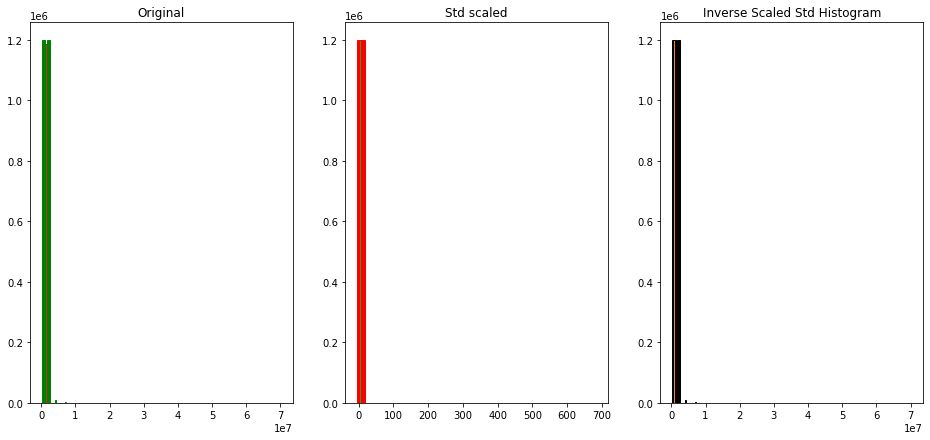

In [15]:
# Inverse Std Scaler

# Import the scalling library
std_scaler = sklearn.preprocessing.StandardScaler()

# Fit the train
std_scaler.fit(train)

x_train_std_scaled = std_scaler.transform(train)
x_validate_std_scaled = std_scaler.transform(validate)
x_test_std_scaled = std_scaler.transform(test)

# Perform the inverse on the min-max
x_train_inverse_transform = std_scaler.inverse_transform(x_train_std_scaled)
x_validate_inverse_transform = std_scaler.inverse_transform(x_validate_std_scaled)
x_test_inverse_transform = std_scaler.inverse_transform(x_test_std_scaled)

plt.figure(figsize = (16, 7))
plt.subplot(131)
plt.hist(train, bins = 25, ec = 'green')
plt.title('Original')

plt.subplot(132)
plt.hist(x_train_std_scaled, bins = 25, ec = 'red')
plt.title('Std scaled')


plt.subplot(133)
plt.hist(x_train_inverse_transform, bins = 25, ec = 'black')
plt.title('Inverse Scaled Std Histogram')

## Inverse Robust Scaler


Text(0.5, 1.0, 'Inverse Scaled Robust Histogram')

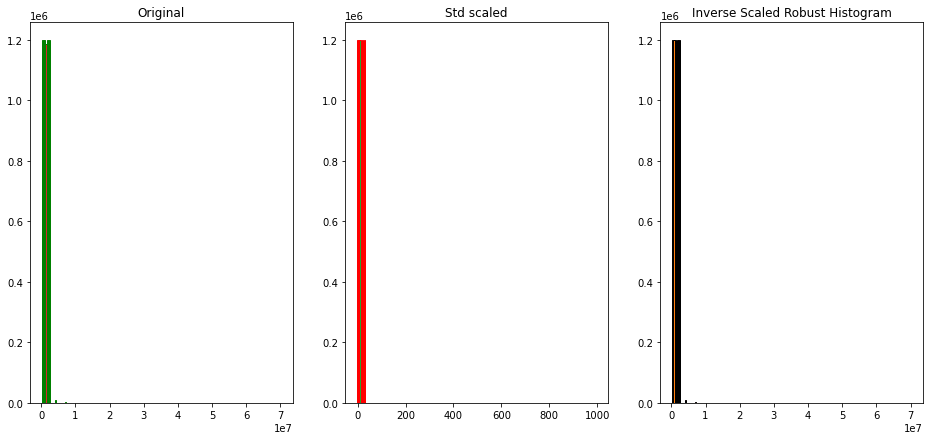

In [16]:
# Import the scalling library
robust_scaler = sklearn.preprocessing.RobustScaler()

# Fit the train
robust_scaler.fit(train)

x_train_robust_scaled = robust_scaler.transform(train)
x_validate_robust_scaled = robust_scaler.transform(validate)
x_test_robust_scaled = robust_scaler.transform(test)

# Perform the inverse on the min-max
x_train_inverse_robust_transform = robust_scaler.inverse_transform(x_train_robust_scaled)
x_validate_inverse_robust_transform = robust_scaler.inverse_transform(x_validate_robust_scaled)
x_test_inverse_robust_transform = robust_scaler.inverse_transform(x_test_robust_scaled)

plt.figure(figsize = (16, 7))
plt.subplot(131)
plt.hist(train, bins = 25, ec = 'green')
plt.title('Original')

plt.subplot(132)
plt.hist(x_train_robust_scaled, bins = 25, ec = 'red')
plt.title('Std scaled')


plt.subplot(133)
plt.hist(x_train_inverse_robust_transform, bins = 25, ec = 'black')
plt.title('Inverse Scaled Robust Histogram')

### (3). Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

In [17]:
# Import the required quantile transformer

from sklearn.preprocessing import QuantileTransformer

In [18]:
# Call the tranformer library
quantile_tranformer = sklearn.preprocessing.QuantileTransformer(output_distribution = 'normal' , random_state = 123)

# Fit the train
quantile_tranformer.fit(train)

QuantileTransformer(output_distribution='normal', random_state=123)

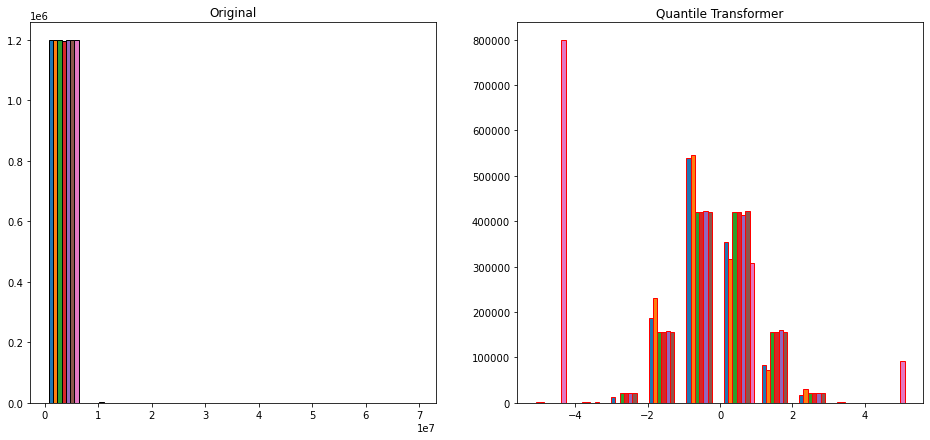

In [19]:
# Fit the validate
x_train_quatile_tranformer = quantile_tranformer.transform(train)
x_validate_quatile_tranformer = quantile_tranformer.transform(validate)
x_test_quatile_tranformer = quantile_tranformer.transform(test)

plt.figure(figsize= (16, 7))
plt.subplot(121)
plt.hist(train, ec ='black')
plt.title('Original')
plt.subplot(122)
plt.hist(x_train_quatile_tranformer, ec ='red')
plt.title('Quantile Transformer')
plt.show()

### (4). Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?

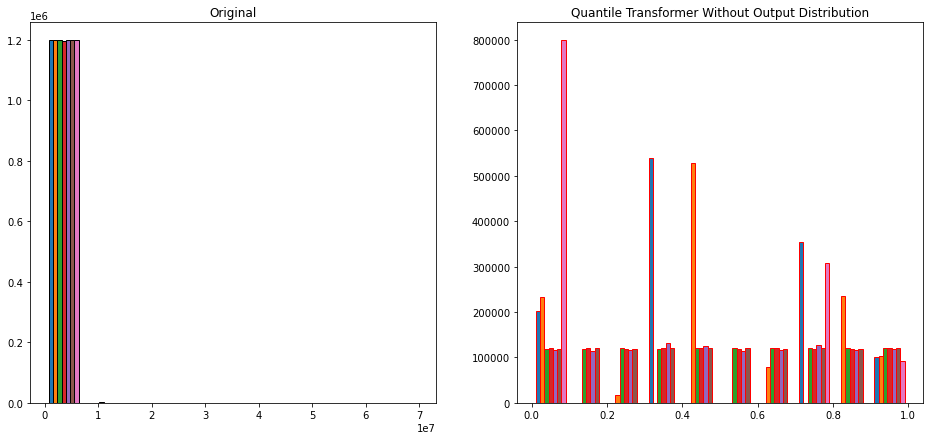

In [20]:
# Import the required quantile transformer

from sklearn.preprocessing import QuantileTransformer

# Call the tranformer library (omitted the output distribution)
quantile_tranformer = sklearn.preprocessing.QuantileTransformer(random_state = 123)

# Fit the train
quantile_tranformer.fit(train)

# Fit the validate
x_train_quatile_tranformer = quantile_tranformer.transform(train)
x_validate_quatile_tranformer = quantile_tranformer.transform(validate)
x_test_quatile_tranformer = quantile_tranformer.transform(test)

plt.figure(figsize= (16, 7))
plt.subplot(121)
plt.hist(train, ec ='black')
plt.title('Original')
plt.subplot(122)
plt.hist(x_train_quatile_tranformer, ec ='red')
plt.title('Quantile Transformer Without Output Distribution')
plt.show()

### (5). Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

In [21]:
x, y, z = min_max_scaller()

Program Status: Acquiring local cached zillow data..
